In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from sklearn.model_selection import train_test_split

train_path = './data/train.csv'
test_path = './data/test.csv'

# reference - custom model example
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/learn/iris_custom_model.py

# https://gist.github.com/damienpontifex/1f03b966d36049b678efdddb54cef4eb

Using TensorFlow backend.


In [3]:
class get_data:
    def __init__(self, path, is_train=True):
        self.is_train = is_train
        
        # load csv file
        data = pd.read_csv(path)
        # split data to feature & label
        if is_train:
            self.feature = data.drop('label', axis=1)
            self.label = data['label']
        else:
            self.feature = data
        # free space
        del data
        
        self.feature = self.deal_feature()
        if is_train:
            self.label = self.deal_label()
            self.ts_f, self.ts_l, self.vs_f, self.vs_l = self.split_t_v()
            
    
    # EDA
    def describe_plot(self):
        sns.countplot(self.label)
    def describe_num(self):
        res = self.label.value_counts()
        print(res)
    
    # reference: How to Check If Any Value is NaN in a Pandas DataFrame
    # https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
    def check_missing_val(self, data_df):
        res = data_df.isnull().values.any()
        print(res)
        
    def deal_feature(self):
        # normolize data
#         feature = self.feature / 255.0
        feature = self.feature.values.reshape(-1, 28, 28, 1)
        return feature
    
    def show_digit(self):
        plt.imshow(self.feature[0][:,:,0])
        
    def deal_label(self):
        label = to_categorical(self.label, num_classes = 10)
        return label
    
    def split_t_v(self):
        # trainingSet_feature
        # trainingSet_label
        # validationSet_feature
        # validationSet_label
        
        ts_f, ts_l, vs_f, vs_l = \
        train_test_split(
            self.feature,
            self.label,
            test_size=0.1,
            random_state=42
        )
        return ts_f, ts_l, vs_f, vs_l

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


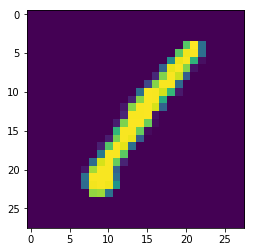

In [6]:
test = get_data(train_path)
test.show_digit()
print(test.label)